In [1]:
import pickle
from ddm_utils import parse_sim_results, run_bads_3param
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('all_sim_results.pkl', 'rb') as f:
    all_sim_results = pickle.load(f)

choices, RTs = parse_sim_results(all_sim_results['a=10,v=2'])

with open('sample_rt.pkl', 'wb') as f:
    pickle.dump(RTs, f)


In [3]:
from joblib import Parallel, delayed
N_bads_run = 100
vaw_bads_vals = np.zeros((N_bads_run,3))
vaw_bads_vals = Parallel(n_jobs=-1)(delayed(run_bads_3param)() for _ in range(N_bads_run))


In [4]:
with open('vaw_bads_vals_v2_a10.pkl', 'wb') as f:
    pickle.dump(vaw_bads_vals, f)


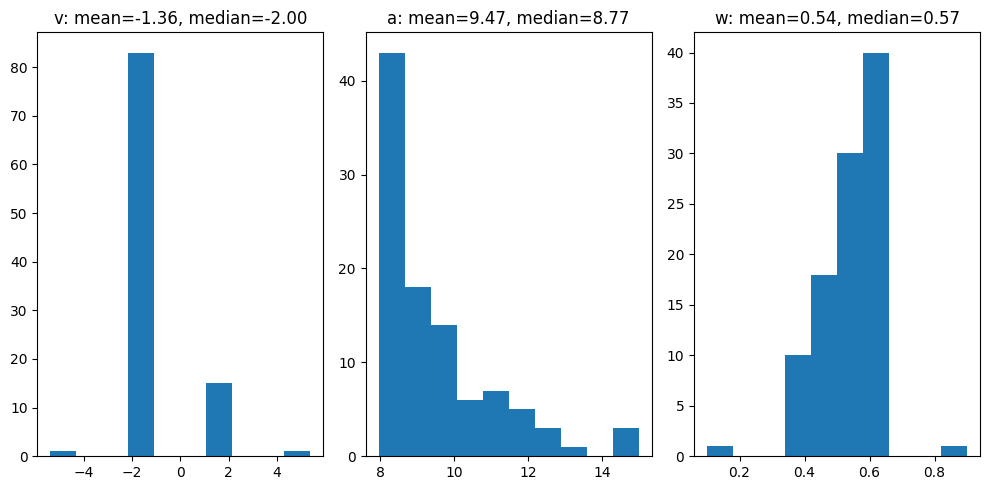

In [10]:
v_vals_from_bads = [x[0] for x in vaw_bads_vals]
a_vals_from_bads = [x[1] for x in vaw_bads_vals]
w_vals_from_bads = [x[2] for x in vaw_bads_vals]

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.hist(v_vals_from_bads)
plt.title(f'v: mean={np.mean(v_vals_from_bads):.2f}, median={np.median(v_vals_from_bads):.2f}')
plt.subplot(1,3,2)
plt.hist(a_vals_from_bads)
plt.title(f'a: mean={np.mean(a_vals_from_bads):.2f}, median={np.median(a_vals_from_bads):.2f}')
plt.subplot(1,3,3)
plt.hist(w_vals_from_bads)
plt.title(f'w: mean={np.mean(w_vals_from_bads):.2f}, median={np.median(w_vals_from_bads):.2f}')
plt.tight_layout()
plt.show()
